## Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime as dt

In [2]:
df = pd.read_csv(r"E:\Practice\bike_Sales.csv")

In [3]:
df.shape

(113036, 18)

In [4]:
df.sample(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
25626,2013-11-21,21,November,2013,55,Adults (35-64),M,Canada,British Columbia,Accessories,Fenders,Fender Set - Mountain,14,8,22,193,112,305
36478,2014-05-07,7,May,2014,43,Adults (35-64),F,France,Hauts de Seine,Accessories,Helmets,"Sport-100 Helmet, Blue",20,13,35,391,260,651
84905,2016-06-27,27,June,2016,30,Young Adults (25-34),F,Australia,Queensland,Accessories,Tires and Tubes,Road Tire Tube,13,1,4,31,13,44
62571,2015-09-12,12,September,2015,34,Young Adults (25-34),F,Germany,Hamburg,Bikes,Road Bikes,"Road-350-W Yellow, 40",1,1083,1701,499,1083,1582
31718,2014-03-01,1,March,2014,58,Adults (35-64),F,Canada,British Columbia,Accessories,Helmets,"Sport-100 Helmet, Black",11,13,35,238,143,381


## Data Cleaning

In [5]:
df.shape

(113036, 18)

In [6]:
## we want to know if there is any duplicates 
df.duplicated().sum()

1000

In [7]:
## remove duplicates
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
## searching for null values 
df.isnull().sum()

Date                0
Day                 0
Month               0
Year                0
Customer_Age        0
Age_Group           0
Customer_Gender     0
Country             0
State               0
Product_Category    0
Sub_Category        0
Product             0
Order_Quantity      0
Unit_Cost           0
Unit_Price          0
Profit              0
Cost                0
Revenue             0
dtype: int64

In [10]:
df.describe()

,Day,Year,Customer_Age,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue
count,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000,112036.000000
mean,15.665607,2014.400925,35.919508,11.904254,267.819603,453.850628,286.035194,471.103333,757.138527
std,8.781485,1.273327,11.016543,9.564877,550.218722,922.751848,454.852634,886.971635,1312.061623
min,1.000000,2011.000000,17.000000,1.000000,1.000000,2.000000,-30.000000,1.000000,2.000000
25%,8.000000,2013.000000,28.000000,2.000000,2.000000,5.000000,29.000000,28.000000,64.000000
50%,16.000000,2014.000000,35.000000,10.000000,9.000000,25.000000,103.000000,112.000000,226.000000
75%,23.000000,2016.000000,43.000000,20.000000,42.000000,70.000000,360.000000,442.000000,806.000000
max,31.000000,2016.000000,87.000000,32.000000,2171.000000,3578.000000,15096.000000,42978.000000,58074.000000


In [11]:
## Adding  a day_name Column
df['Date'] = pd.to_datetime(df['Date'])
df['week_day'] = df['Date'].dt.day_name()
df.sample(5)

,Date,Day,Month,Year,Customer_Age,Age_Group,Customer_Gender,Country,State,Product_Category,Sub_Category,Product,Order_Quantity,Unit_Cost,Unit_Price,Profit,Cost,Revenue,week_day
22215,2016-02-09,9,February,2016,27,Young Adults (25-34),F,Australia,Queensland,Accessories,Cleaners,Bike Wash - Dissolver,17,3,8,63,51,114,Tuesday
20420,2014-04-06,6,April,2014,59,Adults (35-64),F,Canada,British Columbia,Clothing,Caps,AWC Logo Cap,26,7,9,50,182,232,Sunday
55585,2016-06-01,1,June,2016,35,Adults (35-64),M,United States,Washington,Bikes,Mountain Bikes,"Mountain-200 Silver, 42",1,1266,2320,544,1266,1810,Wednesday
7774,2013-09-28,28,September,2013,47,Adults (35-64),F,United States,Washington,Accessories,Bottles and Cages,Water Bottle - 30 oz.,20,2,5,38,40,78,Saturday
71778,2013-10-02,2,October,2013,17,Youth (<25),F,United States,California,Clothing,Shorts,"Women's Mountain Shorts, S",29,26,70,1235,754,1989,Wednesday


## Data Pre-Processing

<AxesSubplot: >

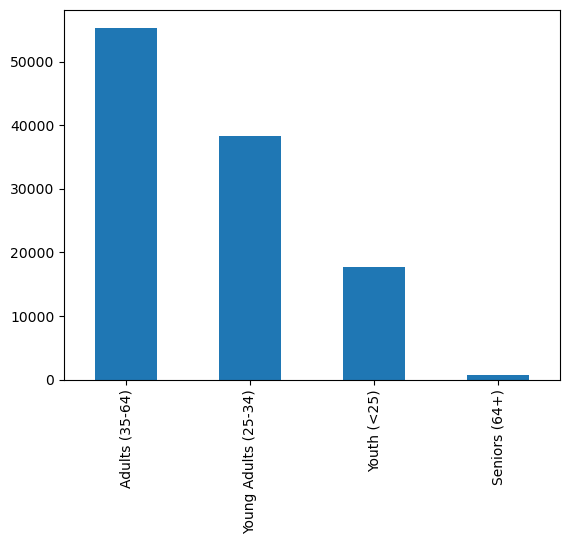

In [12]:
df['Age_Group'].value_counts().plot(kind = 'bar')

<AxesSubplot: >

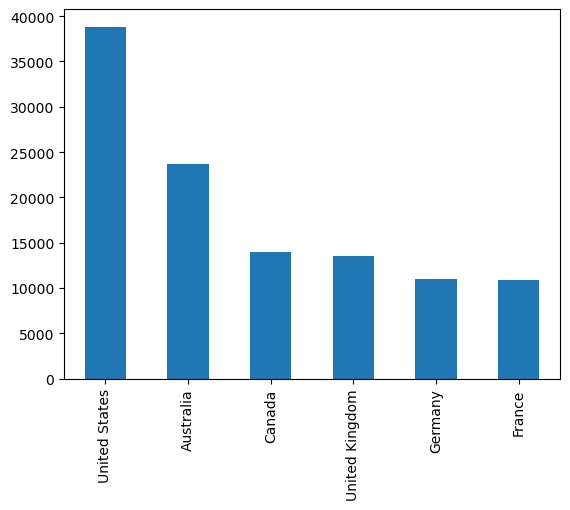

In [13]:
df['Country'].value_counts().plot(kind='bar')

<AxesSubplot: >

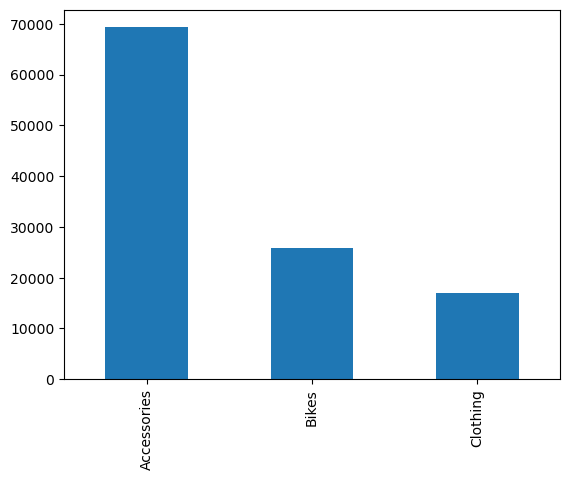

In [14]:
df['Product_Category'].value_counts().plot(kind ='bar')

<AxesSubplot: ylabel='Customer_Gender'>

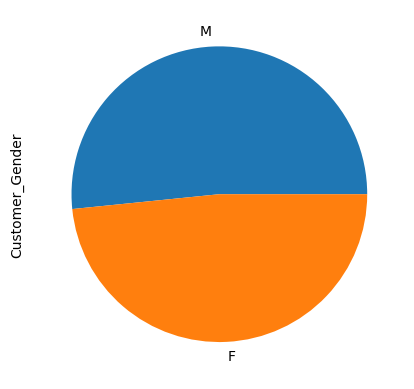

In [15]:
df['Customer_Gender'].value_counts().plot(kind = 'pie')

In [16]:
df['Sub_Category'].value_counts()

Tires and Tubes      33298
Bottles and Cages    15649
Road Bikes           13313
Helmets              12150
Mountain Bikes        8803
Jerseys               6006
Caps                  4358
Fenders               4032
Touring Bikes         3678
Gloves                2686
Cleaners              1802
Shorts                1794
Hydration Packs       1334
Socks                 1122
Vests                  964
Bike Racks             592
Bike Stands            455
Name: Sub_Category, dtype: int64

In [17]:
df['Product'].value_counts()

Water Bottle - 30 oz.      10641
Patch Kit/8 Patches        10256
Mountain Tire Tube          6688
AWC Logo Cap                4358
Sport-100 Helmet, Red       4218
                           ...  
Mountain-100 Silver, 48       58
Mountain-100 Silver, 42       54
Mountain-500 Silver, 48       40
Road-650 Red, 52              32
Mountain-500 Black, 52        22
Name: Product, Length: 130, dtype: int64

## EXPLORATORY DATA ANALYSIS (EDA)

In [18]:
df[['Revenue', 'Cost', 'Profit', 'Order_Quantity']].agg(['sum','mean','min','max']).T

,sum,mean,min,max
Revenue,84826772.0,757.138527,2.0,58074.0
Cost,52780533.0,471.103333,1.0,42978.0
Profit,32046239.0,286.035194,-30.0,15096.0
Order_Quantity,1333705.0,11.904254,1.0,32.0


In [19]:
## NOW, I am going to analyze each column

<AxesSubplot: >

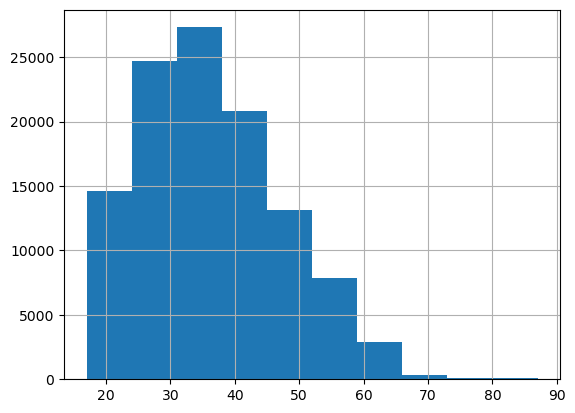

In [20]:
## Customer_Age distribution
df['Customer_Age'].hist()

In [21]:
## Age_Group
## Revenue by Age_Group
revenue_by_age = df.groupby('Age_Group')['Revenue'].sum().sort_values(ascending=False).reset_index()
revenue_by_age

,Age_Group,Revenue
0,Adults (35-64),42367181
1,Young Adults (25-34),30467032
2,Youth (<25),11685489
3,Seniors (64+),307070


Text(0.5, 1.0, 'Revenu by age_group')

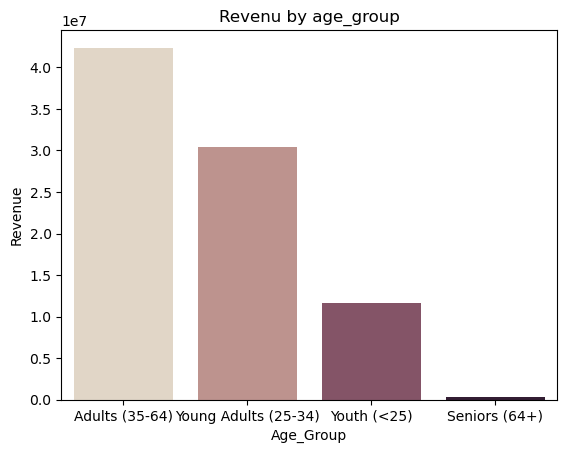

In [22]:
sns.barplot(data=revenue_by_age, x='Age_Group', y='Revenue', palette="ch:.25").set_title("Revenu by age_group")

In [23]:
## Country
## Revenue by Country
revenue_by_Country = df.groupby('Country')['Revenue'].sum().sort_values(ascending=False).reset_index()
revenue_by_Country

,Country,Revenue
0,United States,27777098
1,Australia,21196395
2,United Kingdom,10575628
3,Germany,8956724
4,France,8414745
5,Canada,7906182


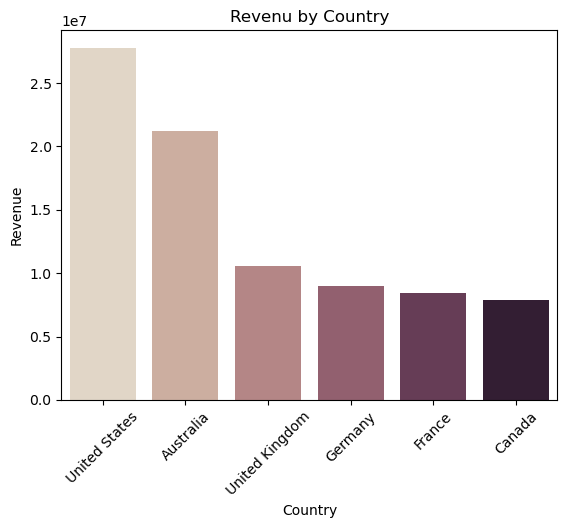

In [24]:
plt.figure()
sns.barplot(data=revenue_by_Country, x='Country', y='Revenue', palette="ch:.25")
plt.title("Revenu by Country")
plt.xticks(rotation=45)
plt.show()

In [25]:
## State
## Revenue by State
revenue_by_State = df.groupby('State')['Revenue'].sum().nlargest(10).reset_index()
revenue_by_State

,State,Revenue
0,California,17529787
1,England,10575628
2,New South Wales,9125980
3,British Columbia,7848334
4,Washington,6701258
5,Queensland,5055843
6,Victoria,5038294
7,Oregon,3435046
8,Hessen,2067980
9,Saarland,2026497


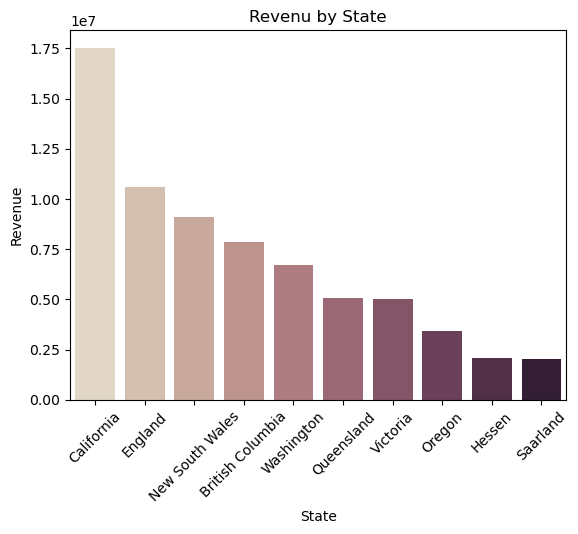

In [26]:
plt.figure()
sns.barplot(data=revenue_by_State, x='State', y='Revenue', palette="ch:.25")
plt.title("Revenu by State")
plt.xticks(rotation=45)
plt.show()

In [27]:
## Product_Category
## Revenue Product_Category
revenue_by_Product_Category = df.groupby('Product_Category')['Revenue'].sum().sort_values(ascending=False).reset_index()
revenue_by_Product_Category

,Product_Category,Revenue
0,Bikes,61434484
1,Accessories,15022766
2,Clothing,8369522


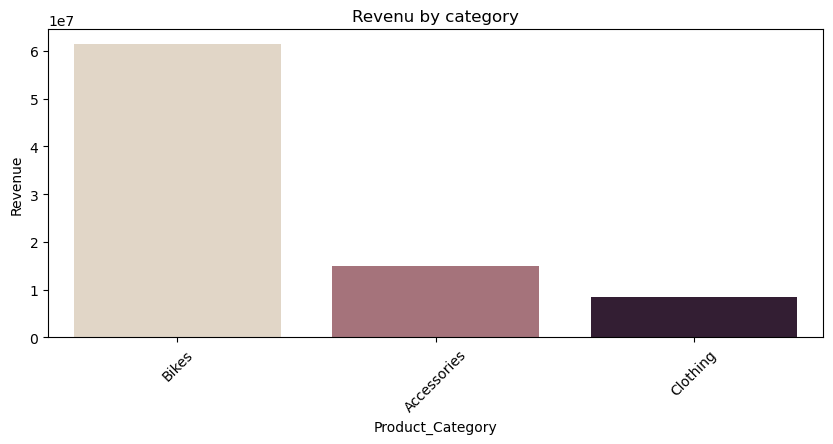

In [28]:
plt.figure(figsize=(10, 4))
sns.barplot(data=revenue_by_Product_Category, 
            x=revenue_by_Product_Category['Product_Category'], 
            y=revenue_by_Product_Category['Revenue'], 
            palette="ch:.25")
plt.title("Revenu by category")
plt.xticks(rotation=45)
plt.show()

In [29]:
## Sub_Category
## Revenue by Sub_Category
revenue_by_Sub_Category = df.groupby('Sub_Category')['Revenue'].sum().sort_values(ascending=False).reset_index()
revenue_by_Sub_Category

,Sub_Category,Revenue
0,Road Bikes,33150708
1,Mountain Bikes,21020794
2,Touring Bikes,7262982
3,Helmets,5738482
4,Tires and Tubes,4598124
5,Jerseys,4112382
6,Shorts,1740710
7,Bottles and Cages,1390570
8,Fenders,1245733
9,Hydration Packs,990406


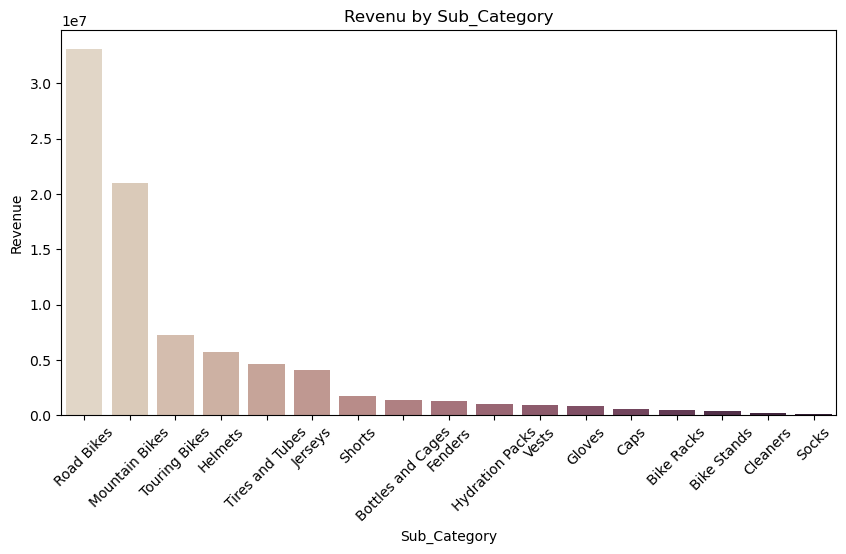

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(data=revenue_by_Sub_Category, 
            x=revenue_by_Sub_Category['Sub_Category'], 
            y=revenue_by_Sub_Category['Revenue'], 
            palette="ch:.25")
plt.title("Revenu by Sub_Category")
plt.xticks(rotation=45)
plt.show()

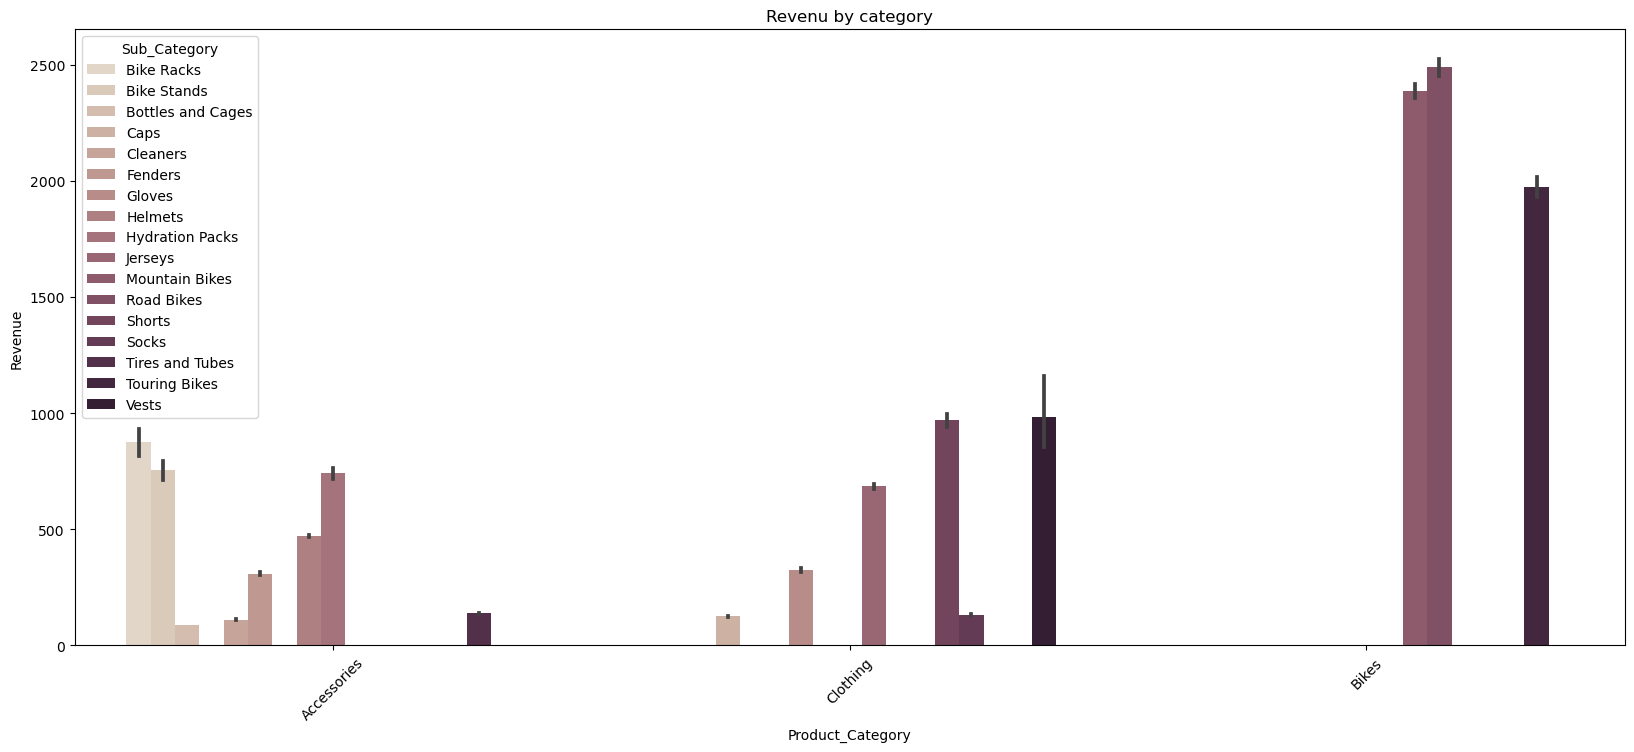

In [31]:
## category and sub_category
plt.figure(figsize=(20,8))
sns.barplot(data=df, 
            x=df['Product_Category'], 
            y=df['Revenue'], 
            hue='Sub_Category', palette="ch:.25")
plt.title("Revenu by category")
plt.xticks(rotation=45)
plt.show()

## Time Series Analysis

In [32]:
## sort data by Date ascending
df.sort_values('Date', inplace=True)

<AxesSubplot: xlabel='Date', ylabel='Revenue'>

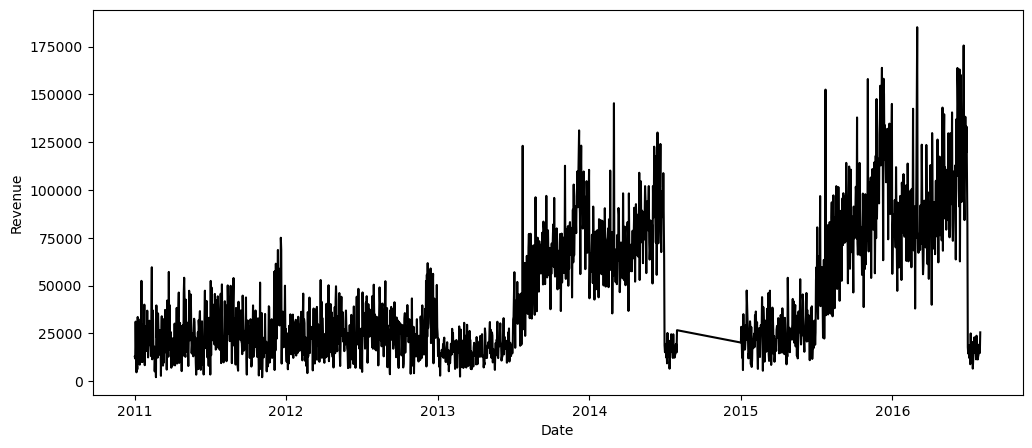

In [76]:
## Revenue Trend 
rev_trend = df.groupby('Date')['Revenue'].sum().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data = rev_trend, x='Date', y='Revenue', color='Black')

In [34]:
## Revenues by Year
rev_by_year = df.groupby('Year')['Revenue'].sum().reset_index()
rev_by_year

,Year,Revenue
0,2011,8951966
1,2012,9133795
2,2013,15117327
3,2014,14040192
4,2015,19945703
5,2016,17637789


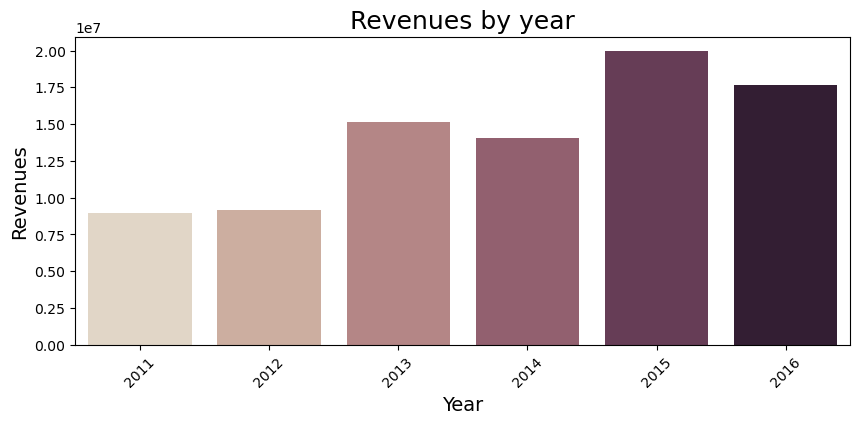

In [35]:
## Revenues by year
plt.figure(figsize=(10,4))
sns.barplot(data=rev_by_year, x="Year", y="Revenue", palette="ch:.25")
plt.xlabel('Year', fontsize=14)
plt.ylabel('Revenues', fontsize=14)
plt.title('Revenues by year', fontsize= 18)
plt.xticks(rotation=45)
plt.show()

In [36]:
## Revenues by Month
rev_by_month = df.groupby('Month')['Revenue'].sum().reset_index().sort_values(by='Revenue', ascending=False)
rev_by_month

,Month,Revenue
2,December,9046323
6,June,8978817
8,May,8789287
0,April,7568874
7,March,7306140
4,January,6961166
3,February,6805834
9,November,6206951
10,October,5956276
11,September,5822197


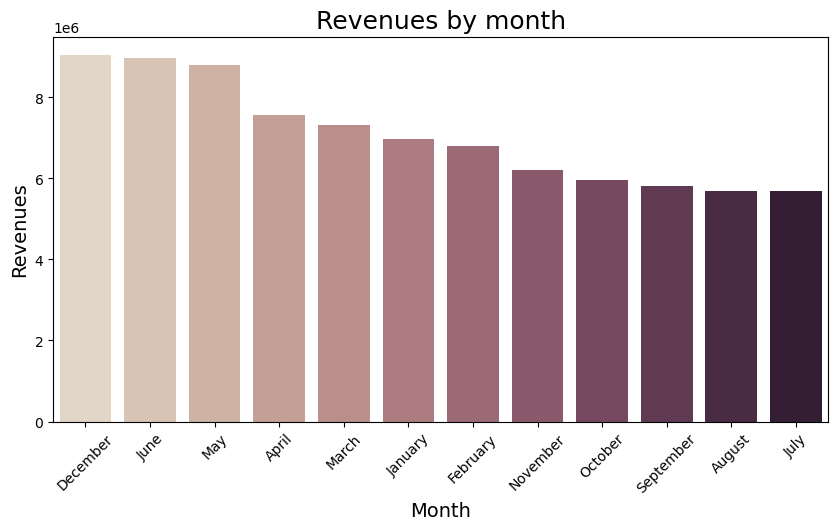

In [79]:
## Revenues by month
plt.figure(figsize=(10,5))
sns.barplot(data=rev_by_month, x="Month", y="Revenue", palette="ch:.25")
plt.xlabel('Month', fontsize=14)
plt.ylabel('Revenues', fontsize=14)
plt.title('Revenues by month', fontsize= 18)
plt.xticks(rotation=45)
plt.show()

In [53]:
## Revenues & Profit by month
rev_pro_by_year = df.groupby('Year')[['Revenue', 'Profit']].sum().sort_values(by = 'Revenue',ascending=False).reset_index()
rev_pro_by_year

,Year,Revenue,Profit
0,2015,19945703,7497361
1,2016,17637789,7002220
2,2013,15117327,5912432
3,2014,14040192,5818522
4,2012,9133795,2938519
5,2011,8951966,2877185


<AxesSubplot: ylabel='Profit'>

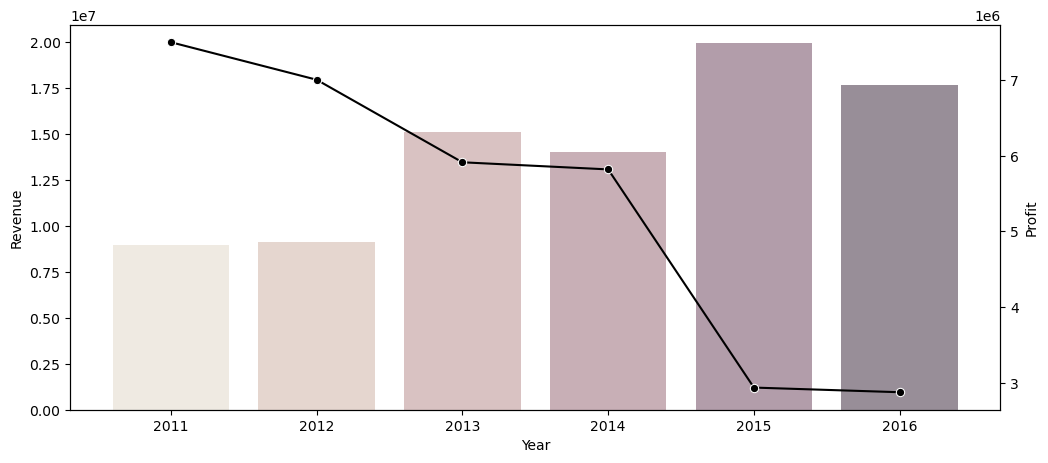

In [75]:
#Revenues & Profit by year

fig, ax1 = plt.subplots(figsize=(12,5))

sns.barplot(data = rev_pro_by_year, x='Year', y='Revenue', alpha=0.5, palette="ch:.25",  ax=ax1)
ax2 = ax1.twinx()

sns.lineplot(data = rev_pro_by_year['Profit'], marker='o', color='Black' ,ax=ax2)


In [40]:
## Revenues & Profit by month
rev_pro_by_month = df.groupby('Month')[['Revenue', 'Profit']].sum().sort_values(by = 'Revenue',ascending=False).reset_index()
rev_pro_by_month

,Month,Revenue,Profit
0,December,9046323,3392298
1,June,8978817,3357787
2,May,8789287,3307882
3,April,7568874,2852086
4,March,7306140,2747038
5,January,6961166,2600859
6,February,6805834,2550781
7,November,6206951,2375038
8,October,5956276,2286909
9,September,5822197,2241597


<AxesSubplot: xlabel='Month', ylabel='Profit'>

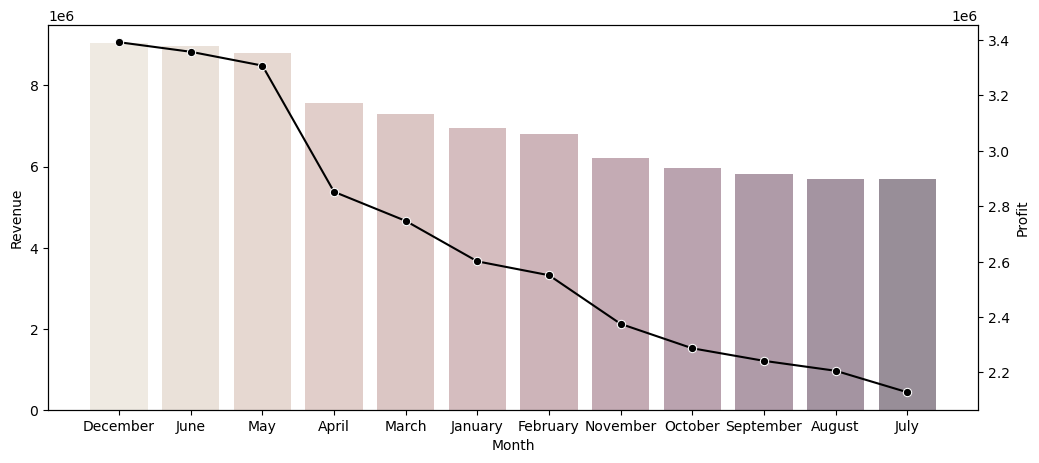

In [68]:
## Revenue & Profit by month

fig, ax1 = plt.subplots(figsize=(12,5))

sns.barplot(data = rev_pro_by_month, x='Month', y='Revenue', alpha=0.5, palette="ch:.25",  ax=ax1)
ax2 = ax1.twinx()

sns.lineplot(data = rev_pro_by_month, x ='Month', y='Profit', marker='o', color='Black',  ax=ax2)



In [43]:
## Revenues & Profit by Days
Day_rev_profit = df.groupby('Day')['Revenue', 'Profit'].sum().reset_index()
Day_rev_profit

C:\Users\BMT\AppData\Local\Temp\ipykernel_13408\3817289792.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Day_rev_profit = df.groupby('Day')['Revenue', 'Profit'].sum().reset_index()


,Day,Revenue,Profit
0,1,2756628,1008982
1,2,2517780,971042
2,3,3063083,1165155
3,4,2615842,986840
4,5,2608020,1009254
5,6,2855473,1086755
6,7,3123615,1161439
7,8,2953453,1100185
8,9,2564496,968003
9,10,2366237,915110


<AxesSubplot: ylabel='Profit'>

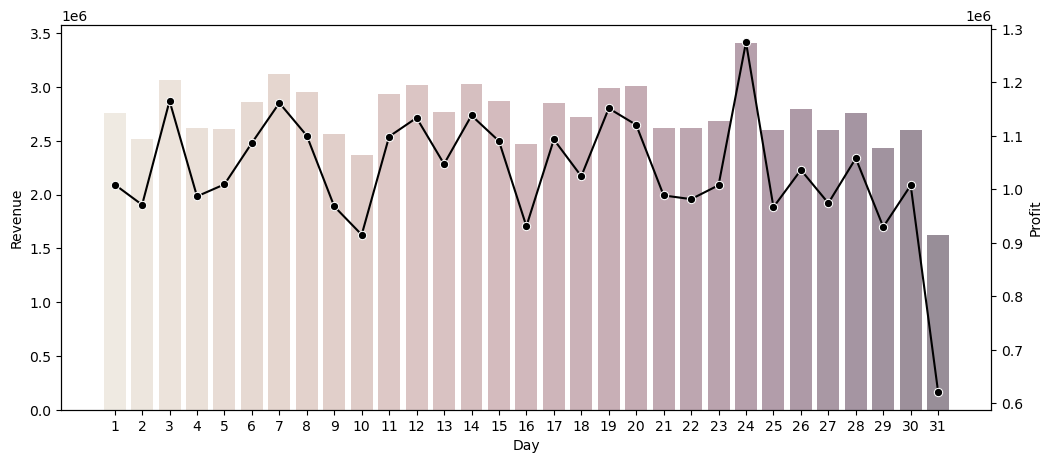

In [69]:
## Revenues & Profit by Days

fig, ax1 = plt.subplots(figsize=(12,5))

sns.barplot(data = Day_rev_profit, x='Day', y='Revenue', alpha=0.5, palette="ch:.25",  ax=ax1)
ax2 = ax1.twinx()

sns.lineplot(data = Day_rev_profit['Profit'], marker='o', color='Black', ax=ax2)



In [45]:
week_Day_rev_profit = df.groupby('week_day')['Revenue', 'Profit'].sum().reset_index()
week_Day_rev_profit

C:\Users\BMT\AppData\Local\Temp\ipykernel_13408\639561615.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  week_Day_rev_profit = df.groupby('week_day')['Revenue', 'Profit'].sum().reset_index()


,week_day,Revenue,Profit
0,Friday,12079275,4512101
1,Monday,12007965,4541823
2,Saturday,12488578,4722589
3,Sunday,12268543,4636229
4,Thursday,11831242,4517802
5,Tuesday,11934925,4520833
6,Wednesday,12216244,4594862


<AxesSubplot: ylabel='Profit'>

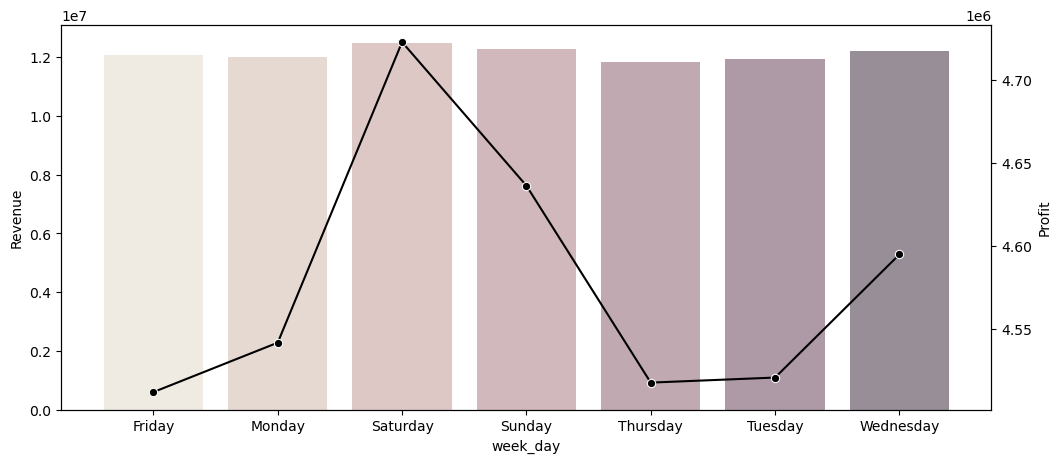

In [71]:
## Revenues & Profit by week_Day

fig, ax1 = plt.subplots(figsize=(12,5))

sns.barplot(data = week_Day_rev_profit, x='week_day', y='Revenue', alpha=0.5, palette="ch:.25", ax=ax1)
ax2 = ax1.twinx()

sns.lineplot(data = week_Day_rev_profit['Profit'], marker='o', color='Black', ax=ax2)
